In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

N.B.: I recommend that you use the `statsmodel` library to do the regression analysis as opposed to *e.g.* `sklearn`. The `sklearn` library is great for advanced topics, but it's easier to get lost in a sea of details and it's not needed for these problems.

# 1.  Fitting a Regression Model [10 points]

Using the following data:

In [2]:
poly_x = np.array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [3]:
poly_y = np.array([-126.99769104, -121.76363745, -107.05551625,  -66.4135443 ,
        -51.66992718,  -40.69610161,  -45.38354202,  -58.75964619,
        -39.16974993,  -33.85796291,  -28.04111151,  -36.81766799,
        -18.28088923,   -6.45665831,  -29.47435017,   -0.75081722,
        -28.57616465,   15.16568923,   16.59302615,   -2.78764992,
        -11.75883341,   13.12494657,   -1.88394446,   22.02465669,
        -16.55482107,   -2.91427672,  -15.78789502,   11.2687875 ,
        -23.09030237,   -3.7153776 ,    7.87571976,   22.1994704 ,
         -5.909068  ,   -0.56562841,   25.03561638,   -5.8824932 ,
         -4.52039745,   31.85118924,   41.35070605,   47.13163559,
         26.12835471,   17.40423706,   27.98496168,   59.02195887,
         68.41065196,   76.08040375,   77.44338322,   83.74765871,
        101.37765463,  113.69478397])

In [4]:
poly = pd.DataFrame( {'x' : poly_x, 'y': poly_y })

Fit a regression model to this data that minimizes the $R^2$ as well as the complexity of the model. You should consider the models discussed in the book and lecture (linear, polynomial and logrithmic models). Explain, in comments using '#' how you arrived at your model.

In [5]:
model = smf.ols(formula='y~x', data=poly).fit()
model.summary()

#I used the regression model on the data. I chose this model, because the R-squared was significant at .789 and then when i checked the model against the qq plot, given the data it seems to fit well.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     179.3
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           7.91e-18
Time:                        18:36:09   Log-Likelihood:                -227.51
No. Observations:                  50   AIC:                             459.0
Df Residuals:                      48   BIC:                             462.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6124      3.306     -0.185      0.854      -7.259       6.034
x             15.0308      1.122     13.392      0.000      12.774      17.288
==============================================================================
Omnibus:                        2.200   Durbin-Watson:                   0.722
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                2.051
Skew:                          -0.412   Prob(JB):                        0.359
Kurtosis:                       2.448   Cond. No.                         2.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# What model and why?

I used the regression model on the data. I chose this model, because the R-squared was significant at .789 and then when i checked the model against the qq plot, given the data it seems to fit well. 

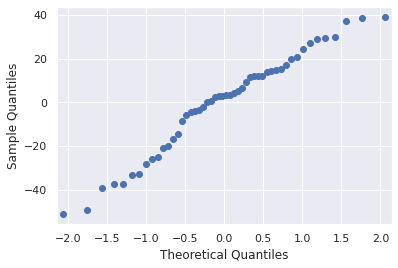

In [6]:
sm.qqplot(model.resid);

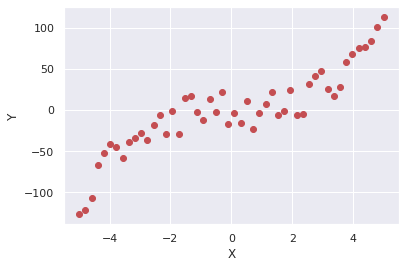

In [7]:
plt.plot(poly.x, poly.y, 'ro');
plt.xlabel('X')
plt.ylabel('Y');

# 2. Multi-Linear Regression [40 pts]

In the following problem, you will construct a simple multi-linear regression model, identify interaction terms and use diagnostic plots to identify outliers in the data. The original problem is as described by John Verzani in the [excellent tutorial 'SimplR' on the R statistics language](https://cran.r-project.org/doc/contrib/Verzani-SimpleR.pdf) and uses data from the 2000 presidential election in Florida. The problem is interesting because it contains a small number of highly leveraged points that influence the model.

In [8]:
votes = pd.read_csv('fl2000.txt', delim_whitespace=True, comment='#')
votes = votes[['county', 'Bush', 'Gore', 'Nader', 'Buchanan']]
votes.describe(include='all')

,county,Bush,Gore,Nader,Buchanan
count,67,67.000000,67.000000,67.000000,67.000000
unique,67,NaN,NaN,NaN,NaN
top,Okeechobee,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,43450.970149,43453.985075,1454.119403,260.880597
std,NaN,57182.620266,75070.435056,2033.620972,450.498092
min,NaN,1317.000000,789.000000,19.000000,9.000000
25%,NaN,4757.000000,3058.000000,95.500000,46.500000
50%,NaN,20206.000000,14167.000000,562.000000,120.000000
75%,NaN,56546.500000,46015.000000,1870.500000,285.500000


### 2a. Plot a pair plot of the data using the `seaborn` library. [5 pts]

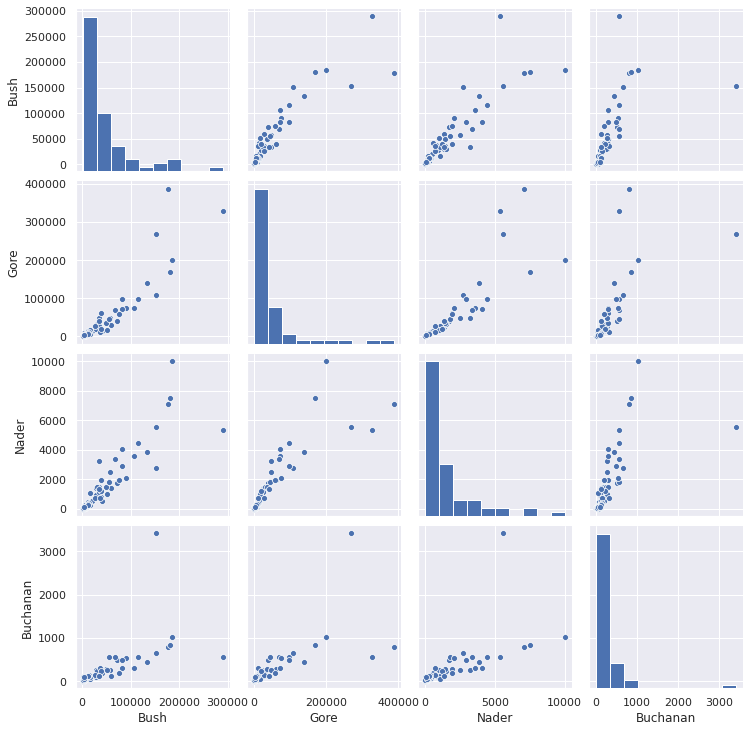

In [9]:
sns.pairplot(votes);

### 2b. Comment on the relationship between the quantiative datasets. Are they correlated? Colinear? [5 pts]

In [10]:
# your answer
votes.corr()

,Bush,Gore,Nader,Buchanan
Bush,1.000000,0.912652,0.892249,0.625185
Gore,0.912652,1.000000,0.864378,0.691314
Nader,0.892249,0.864378,1.000000,0.654215
Buchanan,0.625185,0.691314,0.654215,1.000000


### 2c. Multi-linear [5 pts]

Construct a mulit-linear model without interaction terms predicting the Bush column on the other columns and print out the summary table

In [11]:
# your answer
multi_lin = smf.ols(formula='Bush~Gore+Nader+Buchanan', data=votes).fit()
multi_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Bush   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     149.5
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           1.35e-28
Time:                        18:36:44   Log-Likelihood:                -758.33
No. Observations:                  67   AIC:                             1525.
Df Residuals:                      63   BIC:                             1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8647.6837   3133.545      2.760      0.008    2385.793    1.49e+04
Gore           0.4475      0.071      6.305      0.000       0.306       0.589
Nader         11.8533      2.503      4.735      0.000       6.851      16.855
Buchanan      -7.2033      7.864     -0.916      0.363     -22.917       8.511
==============================================================================
Omnibus:                       20.698   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.017
Skew:                           0.383   Prob(JB):                     1.59e-28
Kurtosis:                       9.728   Cond. No.                     1.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2d. Multi-linear with interactions [10 pts]

Construct a multi-linear model with interactions that are statistically significant at the $p = 0.05$ level. You can start with full interactions and then eliminate interactions are do not meet the $p = 0.05$ threshold.

In [12]:
# your answer
model_interaction = smf.ols(formula='Bush~Gore*Buchanan', data=votes).fit()
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Bush   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     256.2
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           3.10e-35
Time:                        18:36:44   Log-Likelihood:                -742.05
No. Observations:                  67   AIC:                             1492.
Df Residuals:                      63   BIC:                             1501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4242.8792   3084.337     -1.376      0.174   -1.04e+04    1920.677
Gore              0.7971      0.038     20.875      0.000       0.721       0.873
Buchanan        115.2876     14.715      7.835      0.000      85.881     144.694
Gore:Buchanan    -0.0005   5.69e-05     -8.711      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       19.234   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.766
Skew:                          -0.387   Prob(JB):                     7.98e-23
Kurtosis:                       8.988   Cond. No.                     1.97e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2e. Leverage [5 pts]

Plot the *leverage* vs. the square of the residual as described in the diagnostic plots.

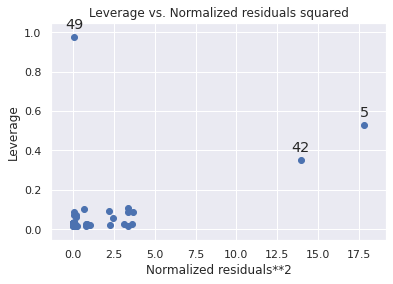

In [13]:
# your answer
sm.graphics.plot_leverage_resid2(model_interaction, alpha=0.05);

### 2f. Identify and Clean [5pts]

The leverage *vs* residual plot indicates that some rows have high leverage but small residuals and others have high residual. The $R^2$ of the model is determined by the residual. The data is from the disputed 2000 election [where one county](https://en.wikipedia.org/wiki/2000_United_States_presidential_election_recount_in_Florida) caused significant issues.

Display the *4* rows for the points indicated having high leverage and/or high residual squared. You will use this to improve the model $R^2$.

In [14]:
# your answer
votes.iloc[[49,5,42]]

,county,Bush,Gore,Nader,Buchanan
49,PalmBeach,152951,269732,5565,3411
5,Broward,177902,387703,7104,795
42,MiamiDade,289533,328808,5352,560


### 2g. Final model [5 pts]

Develop your final model by dropping *one* of the troublesome data points indicated in the leverage *vs* residual plot and insuring any interactions in your model are still significant at $p=0.05$. Your model should have an $R^2$ great than 0.95.

In [29]:
# your answer
model_final = smf.ols(formula='Bush~Gore*Buchanan', data=votes.drop([5])).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Bush   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     553.4
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           1.10e-44
Time:                        22:05:15   Log-Likelihood:                -703.98
No. Observations:                  66   AIC:                             1416.
Df Residuals:                      62   BIC:                             1425.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1306.0261   2076.138     -0.629      0.532   -5456.167    2844.115
Gore              0.9737      0.032     30.321      0.000       0.910       1.038
Buchanan         63.9575     11.330      5.645      0.000      41.309      86.606
Gore:Buchanan    -0.0004    4.1e-05     -8.630      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        8.011   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               16.042
Skew:                           0.117   Prob(JB):                     0.000328
Kurtosis:                       5.404   Cond. No.                     1.90e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3. Body Mass Index Model

In this problem, you will first clean a data set and create a model to estimate body fat based on the common BMI measure. Then, you will use the **forward stepwise selection** and **backware stepwise selection** methods to create more accurate predictors for body fat.

The body density dataset in file `bodyfat` includes the following 15 variables listed from left to right:
* Density : Density determined from underwater weighing
* Fat : Percent body fat from Siri’s (1956) equation
* Age : Age (years)
* Weight : Weight (kg)
* Height : Height (cm)
* Neck : Neck circumference (cm)
* Chest: Chest circumference (cm)
* Abdomen : Abdomen circumference (cm)
* Hip : Hip circumference (cm)
* Thigh : Thigh circumference (cm)
* Knee : Knee circumference (cm)
* Ankle : Ankle circumference (cm)
* Biceps : Biceps (extended) circumference (cm)
* Forearm : Forearm circumference (cm)
* Wrist : Wrist circumference (cm)

The `Density` column is the "gold standard" -- it is a measure of body density obtained by dunking people in water and measuring the displacement. The `Fat` column is a prediction using another statistical model. The body mass index (BMI) is [calculated as Kg/m^2](https://en.wikipedia.org/wiki/Body_mass_index) and is used to classify people into different weight categories with a [BMI over 30 being 'obese'](https://www.medicalnewstoday.com/info/obesity). You will find that BMI is a poor predictor of the `Density` information it purports to predict. You will try to find better models using measurements and regression.

Unfortunately for us, the dataset we have has imperial units for weight and height, so we will convert those to metric and then calculate the BMI and plot the KDE of the data.

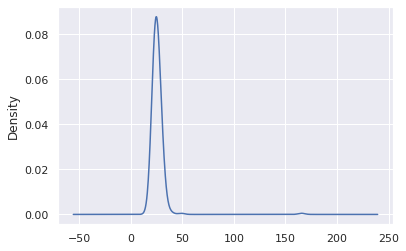

In [16]:
fat = pd.read_csv('bodyfat.csv')
fat = fat.drop('Unnamed: 0', axis=1)
fat.Weight = fat.Weight * 0.453592 # Convert to Kg
fat.Height = fat.Height * 0.0254 # convert inches to m
fat['BMI'] = fat.Weight / (fat.Height**2)
fat.BMI.plot.kde();

### 3a. [5 pts]
The BMI has at least one outlier since it's unlikely anyone has a BMI of 165, even [Arnold Schwarzenegger](http://www.health.com/health/gallery/0,,20460621,00.html).

Form a new table `cfat` (cleaned fat) that removes any rows with a BMI greater than 40 and calculate the regression model predicting the `Density` from the `BMI`. Display the summary of the regression model. You should achieve an $R^2$ of at least 0.53.

In [17]:
# your answer
badBMI = fat[fat['BMI'] > 40].index
fat.drop(badBMI, inplace=True)
cfat = fat

model_density = smf.ols('Density~BMI', data=cfat).fit()
model_density.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     286.2
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           3.25e-43
Time:                        18:36:48   Log-Likelihood:                 734.17
No. Observations:                 250   AIC:                            -1464.
Df Residuals:                     248   BIC:                            -1457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1602      0.006    186.410      0.000       1.148       1.172
BMI           -0.0041      0.000    -16.918      0.000      -0.005      -0.004
==============================================================================
Omnibus:                        2.262   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                2.259
Skew:                           0.229   Prob(JB):                        0.323
Kurtosis:                       2.916   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3b. [5 pts]
Plot your regression model against the BMI measurement, properly labeling the scatterplot axes and showing the regression line. In subsequent models, you will not be able to plot the Density *vs* your predictors because you will have too many predictors, but it's useful to visually understand the relationship between the BMI predictor and the `Density` because you should find that the regression line goes through the data but there is too much variability in the data to achieve a good $R^2$.

Model is Y =  1.1602322201287334 + -0.004127636875698852 *BMI


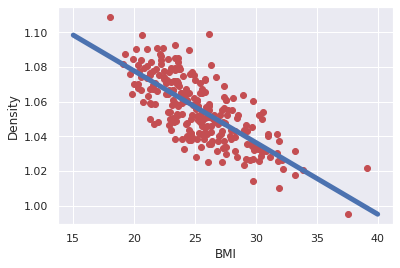

In [18]:
# your answer
beta0,beta1 = model_density.params
print('Model is Y = ', beta0, '+', beta1, '*BMI')

plt.plot(cfat.BMI, cfat.Density, 'ro');

xticks = np.linspace(15,40,10)
plt.plot(xticks, beta0 + beta1 * xticks, lw=5)

plt.xlabel('BMI')
plt.ylabel('Density');

## 4. Constructing Better Predictors for Bodyfat [40 pts]

 The `BMI` model uses easy-to-measure predictors, but has a poor $R^2 \sim 0.54$. We will use structured subset selection methods from ISLR Chapter 6.1 to derive two better predictors. That chapter covers *best subset*, *forward stepwise* and *backware stepwise* selection. I have implemented the *best subset* selection which searches across all combinations of $1, 2, \ldots, p$ predictors and selects the best predictor based on the $\textit{adjusted}~R^2$ metric. This method involved analyzing $2^{13} = 8192$ regression models (programming and computers for the win). The resulting $\textit{adjusted}~R^2$ plot is shown below:
 
 <img src='fat-best-rsqadj.png'>
 
In this plot, `test_fat` and `train_fat` datasets each containing 200 randomly selected samples were derived from the `cfat` dataset using `np.random.choice` over the `cfat.index` and selected using the Pandas `loc` method. Then, following the algorithm of ISLR Algorithm 6.1 *Best Subset Selection*, all $p \choose k$ models with $k$ predictors were evaluated on the training data and the model returning the best $\textit{Adjusted}~R^2$ was selected. These models are indicated by the data points for the solid blue line. As the text indicates, other measures (AIC, BIC, $C_p$) would be better than the $\textit{Adjusted}~R^2$, but we use it becuase because you've already seen the $R^2$ and should have an understanding of what it means.

Then, the best models for each $k$ were evaluated for the `test_fat` data. These results are shown as the red dots below the blue line. Note that because the test and train datasets are randomly selected subsets, the results vary from run-to-run and it may that your test data produces better $R^2$ than your training data.

This splitting of the data into a test and train set is similar to the *validation set approach* that you can read about in Chapter 5 of ISLR if you choose, but differs in that the two sets may contain duplicate data. The chief reason to use a test and training set is to drill into your skull the limitation of models on unseen data.

In the following exercises, you can not use the `Density`, `Fat` or `BMI` columns in your predictive models. You can only use the 13 predictors in the `allowed_factors` list.

In [19]:
allowed_factors = ['Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']

## Forward Stepwise Refinement

You will manuall perform the steps of the *forward stepwise selection* method for four parameters. You will do this following Algorithm 6.2 from ISLR. For $k = 1\ldots 4$:
* Set up a regression model with $k$ factors that involves the fixed predictors from the previous step $k-1$
* Try all $p$ predictors in the new $k$th position
* Select the best parameter using $\textit{Adjusted}-R^2$ (e.g. `model.rsquared_adj`) given your training data
* Fix the new parameter and continue the process for $k+1$

Then, you will construct a plot similar to the one above, plotting the $\textit{Adjusted}-R^2$ for each of your $k$ steps and plotting the $\textit{Adjusted}-R^2$ from the test set using that model.

### 4a. [5 pts]
First, construct your training and test sets. These should each contain 200 (possibly duplicated) samples from your `cfat` dataset:

In [28]:
# your answer
testFatIndex =np.random.choice(cfat.index,200)
trainFatIndex = np.random.choice(cfat.index,200)
test_data = cfat.loc[testFatIndex]
train_data = cfat.loc[trainFatIndex]
# print(train_data)
# print(test_data)

print(test_data.shape)
print(test_data.shape)

(200, 16)
(200, 16)


In [21]:
R2 = []
#loops through allowed factors and logging thier adjusted rsquared values for test data.
for i in range(len(allowed_factors)):
    maxx = 0
    test_model = smf.ols(formula='Density~Abdomen+Weight+Wrist+Hip+{}'.format(allowed_factors[i]), data=test_data).fit()
    RSS = test_model.rsquared_adj
    R2.append(RSS)

# RT2=[]
# #loops through allowed factors and logging thier adjusted rsquared values for training data.
# for i in range(len(allowed_factors)):
#     maxx = 0
#     train_model = smf.ols(formula='Density~Abdomen+Weight+Wrist+{}'.format(allowed_factors[i]), data=train_data).fit()
#     RSST = train_model.rsquared_adj
#     RT2.append(RSST)
    
for i in range(len(R2)):
    if R2[i] == max(R2):
        print("The max R2 for test data: ", R2[i])
        print("which is the predictor: ", allowed_factors[i])
        print("Index R2: ", i, "\n")
        
# for j in range(len(RT2)):
#     if max(RT2) == RT2[j]:
#         print("The max RT2 for training data: ", RT2[j])
#         print("which is the predictor: ", allowed_factors[j])
#         print("Index RTS: ", j)

The max R2 for test data:  0.6619462477234165
which is the predictor:  Biceps
Index R2:  10 



### 4b. Conduct the algorithm above for $k=1$, leaving your best solution as the answer [5 pts]

In [22]:
# your answer
test_model1 = smf.ols(formula='Density~Abdomen', data=test_data).fit()
print("Testing Model", test_model1.summary());
print("\n\nThe test_model adjusted R-Squared is: ", test_model1.rsquared_adj, "\n")

#Do same for training data
# print("Training Model",train_model1.summary())
# print("\n\nThe train_model adjusted R-Squared is: ",train_model1.rsquared_adj)
#train_model1 = smf.ols(formula='Density~Abdomen', data=train_data).fit()

Testing Model                             OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     221.0
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           4.61e-34
Time:                        18:36:52   Log-Likelihood:                 583.65
No. Observations:                 200   AIC:                            -1163.
Df Residuals:                     198   BIC:                            -1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1856      0.009    13

### 4c. Conduct the algorithm above for $k=2$, leaving your best solution as the answer [5 pts]

In [23]:
# your answer
# your answer

test_model2 = smf.ols(formula='Density~Abdomen+Weight', data=test_data).fit()
print("Testing Model", test_model2.summary());
print("\n\nThe test_model adjusted R-Squared is: ", test_model2.rsquared_adj, "\n")

#Do same for Training Data 
# train_model2 = smf.ols(formula='Density~Abdomen+Weight', data=train_data).fit()
# print("Training Model", train_model2.summary())
# print("\n\nThe train_model adjusted R-Squared is: ",train_model2.rsquared_adj)


Testing Model                             OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           3.02e-40
Time:                        18:36:52   Log-Likelihood:                 601.08
No. Observations:                 200   AIC:                            -1196.
Df Residuals:                     197   BIC:                            -1186.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2001      0.008    14

### 4d. Conduct the algorithm above for $k=3$, leaving your best solution as the answer [5 pts]

In [24]:
# your answer
test_model3 = smf.ols(formula='Density~Abdomen+Weight+Wrist', data=test_data).fit()
print("Testing Model", test_model3.summary());
print("\n\nThe test_model adjusted R-Squared is: ", test_model3.rsquared_adj, "\n")

# train_model3 = smf.ols(formula='Density~Abdomen+Height+Wrist', data=train_data).fit()
# print("Training Model", train_model3.summary())
# print("\n\nThe train_model adjusted R-Squared is: ",train_model3.rsquared_adj)

Testing Model                             OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     119.1
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           6.26e-44
Time:                        18:36:52   Log-Likelihood:                 612.46
No. Observations:                 200   AIC:                            -1217.
Df Residuals:                     196   BIC:                            -1204.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1046      0.021     5

### 4e. Conduct the algorithm above for $k=4$, leaving your best solution as the answer [5 pts]

In [25]:
# your answer

test_model4 = smf.ols(formula='Density~Abdomen+Weight+Wrist+Hip', data=test_data).fit()
print("Testing Model", test_model4.summary());
print("\n\nThe test_model adjusted R-Squared is: ", test_model4.rsquared_adj, "\n")

# train_model4 = smf.ols(formula='Density~Abdomen+Height+Wrist+Ankle', data=train_data).fit()
# print("Training Model", train_model4.summary())
# print("\n\nThe train_model adjusted R-Squared is: ",train_model4.rsquared_adj)


Testing Model                             OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     88.91
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           7.09e-43
Time:                        18:36:52   Log-Likelihood:                 612.51
No. Observations:                 200   AIC:                            -1215.
Df Residuals:                     195   BIC:                            -1199.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1135      0.036     3

### 4f. Conduct the algorithm above for $k=5$, leaving your best solution as the answer [5 pts]

In [26]:
# your answer
test_model5 = smf.ols(formula='Density~Abdomen+Weight+Wrist+Hip+Chest', data=test_data).fit()
print("Testing Model", test_model5.summary());
print("\n\nThe test_model adjusted R-Squared is: ", test_model5.rsquared_adj, "\n")


#train_model5 = smf.ols(formula='Density~Abdomen+Height+Wrist+Ankle+Forearm', data=train_data).fit()
# print("Training Model", train_model5.summary())
# print("\n\nThe train_model adjusted R-Squared is: ",train_model5.rsquared_adj)


Testing Model                             OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     73.05
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           9.79e-43
Time:                        18:36:53   Log-Likelihood:                 614.57
No. Observations:                 200   AIC:                            -1217.
Df Residuals:                     194   BIC:                            -1197.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0865      0.038     2

### 4g. Plot [5 pts]

Plot your resulting $\textit{adjusted}~R^2$ *vs* number of predictors and overlay the $\textit{adjusted}~R^2$ for the test data.

In [27]:
# your answer

### 4h. Discussion [5 pts]

The BMI model has the benefit being simple (two measurements, height and wright). Looking at your resulting regression model, how many parameters would you suggest to use for your enhanced BMI model? Justify your answer using your models.